In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
prop_elem = pd.read_csv('prop_elem_AstFam_8p.csv')
AstFam = pd.read_csv('AstFam_data.csv')
AstDys = pd.read_csv('Asteroids_data.csv')
AstFam_sig = pd.read_csv('AstFam_sig.txt')
AstDys_sig = pd.read_csv('AstDys_sig.txt')

names1 = np.array(AstDys['Name'])
names2 = np.array(AstDys_sig['Name'])
names3 = np.array(AstFam['Name'])
names4 = np.array(AstFam_sig['Name'])
names5 = np.array(prop_elem['Name'])

prop_elem = prop_elem.loc[prop_elem['Name'].isin(names1)]
AstFam = AstFam.loc[AstFam['Name'].isin(names1)]
AstDys = AstDys.loc[AstDys['Name'].isin(names1)]
AstFam_sig = AstFam_sig.loc[AstFam_sig['Name'].isin(names1)]
AstDys_sig = AstDys_sig.loc[AstDys_sig['Name'].isin(names1)]

prop_elem = prop_elem.loc[prop_elem['Name'].isin(names2)]
AstFam = AstFam.loc[AstFam['Name'].isin(names2)]
AstDys = AstDys.loc[AstDys['Name'].isin(names2)]
AstFam_sig = AstFam_sig.loc[AstFam_sig['Name'].isin(names2)]
AstDys_sig = AstDys_sig.loc[AstDys_sig['Name'].isin(names2)]

prop_elem = prop_elem.loc[prop_elem['Name'].isin(names3)]
AstFam = AstFam.loc[AstFam['Name'].isin(names3)]
AstDys = AstDys.loc[AstDys['Name'].isin(names3)]
AstFam_sig = AstFam_sig.loc[AstFam_sig['Name'].isin(names3)]
AstDys_sig = AstDys_sig.loc[AstDys_sig['Name'].isin(names3)]

prop_elem = prop_elem.loc[prop_elem['Name'].isin(names4)]
AstFam = AstFam.loc[AstFam['Name'].isin(names4)]
AstDys = AstDys.loc[AstDys['Name'].isin(names4)]
AstFam_sig = AstFam_sig.loc[AstFam_sig['Name'].isin(names4)]
AstDys_sig = AstDys_sig.loc[AstDys_sig['Name'].isin(names4)]

prop_elem = prop_elem.loc[prop_elem['Name'].isin(names5)]
AstFam = AstFam.loc[AstFam['Name'].isin(names5)]
AstDys = AstDys.loc[AstDys['Name'].isin(names5)]
AstFam_sig = AstFam_sig.loc[AstFam_sig['Name'].isin(names5)]
AstDys_sig = AstDys_sig.loc[AstDys_sig['Name'].isin(names5)]

In [89]:
prop_elem = prop_elem.reset_index()
AstFam = AstFam.reset_index()
AstDys = AstDys.reset_index()
AstFam_sig = AstFam_sig.reset_index()
AstDys_sig = AstDys_sig.reset_index()

res = np.zeros(len(prop_elem))
res31up = np.where(prop_elem['sma'] < 2.55)
res21up = np.where(prop_elem['sma'] < 3.329)
res52up = np.where(prop_elem['sma'] < 2.875)
res73up = np.where(prop_elem['sma'] < 3.008)

res31down = np.where(prop_elem['sma'] > 2.45)
res21down = np.where(prop_elem['sma'] > 3.229)
res52down = np.where(prop_elem['sma'] > 2.775)
res73down = np.where(prop_elem['sma'] > 2.908)

res31 = np.intersect1d(res31up,res31down)
res21 = np.intersect1d(res21up,res21down)
res52 = np.intersect1d(res52up,res52down)
res73 = np.intersect1d(res73up,res73down)

res = np.concatenate([res31,res21,res52,res73],axis=None)
res = np.sort(res)
print(res)

[  14   15   26   27   31   33   44   59   66   67   72   79   87  114
  126  135  146  154  162  169  173  174  178  190  193  211  212  225
  230  233  236  237  242  250  257  259  264  265  272  281  284  285
  287  304  318  320  321  326  330  337  339  340  345  348  350  355
  364  375  378  381  382  384  390  391  392  395  400  403  404  405
  409  415  418  422  425  428  433  434  436  439  443  445  449  451
  454  459  461  464  468  480  481  483  496  501  502  503  506  514
  516  524  534  539  559  572  577  585  587  591  593  598  602  609
  614  617  627  628  630  631  633  636  637  645  646  647  650  651
  654  668  670  672  675  681  685  690  692  698  699  705  706  717
  719  721  725  726  728  730  735  745  746  748  749  760  766  770
  771  772  777  780  789  794  797  805  815  818  820  823  831  833
  835  849  850  852  853  862  863  868  870  874  877  878  880  883
  887  893  895  910  917  920  921  925  930  936  937  941  950  958
  959 

2.676950263344135


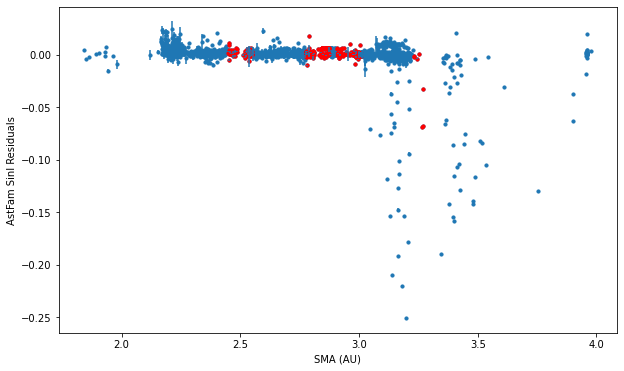

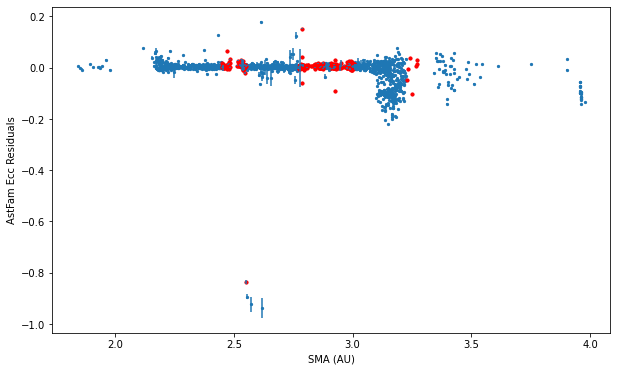

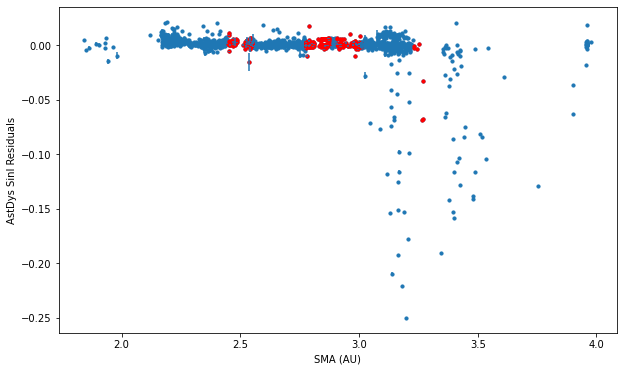

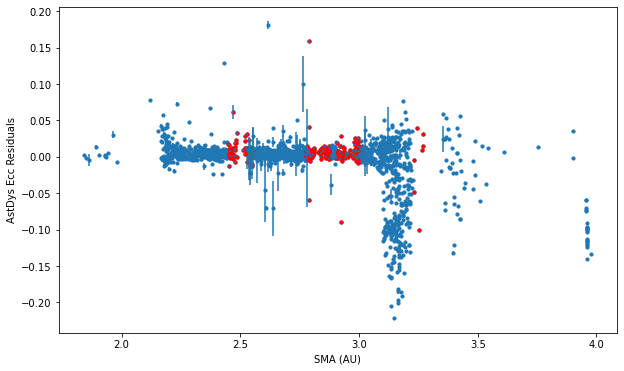

In [96]:
plt.figure(figsize=(10,6))
print(prop_elem['sma'][161])
plt.scatter(prop_elem['sma'],prop_elem['calc_sinI']-AstFam['sinI'],s=10)
plt.scatter(prop_elem['sma'][res],prop_elem['calc_sinI'][res]-AstFam['sinI'][res],s=10,c='r')
plt.errorbar(prop_elem['sma'],prop_elem['calc_sinI']-AstFam['sinI'], yerr=AstFam_sig['sinI'], xerr=None,fmt='none')
plt.xlabel('SMA (AU)')
plt.ylabel('AstFam SinI Residuals')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(prop_elem['sma'],prop_elem['calc_ecc']-AstFam['e'],s=5)
plt.scatter(prop_elem['sma'][res],prop_elem['calc_ecc'][res]-AstFam['e'][res],s=10,c='r')
plt.errorbar(prop_elem['sma'],prop_elem['calc_ecc']-AstFam['e'], yerr=AstFam_sig['e'], xerr=None,fmt='none')
plt.xlabel('SMA (AU)')
plt.ylabel('AstFam Ecc Residuals')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(prop_elem['sma'],np.array(prop_elem['calc_sinI'])-np.array(AstDys['sinI']),s=10)
plt.scatter(prop_elem['sma'][res],prop_elem['calc_sinI'][res]-AstDys['sinI'][res],s=10,c='r')
plt.errorbar(prop_elem['sma'],np.array(prop_elem['calc_sinI'])-np.array(AstDys['sinI']), yerr=AstDys_sig['sinI'], xerr=None,fmt='none')
plt.xlabel('SMA (AU)')
plt.ylabel('AstDys SinI Residuals')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(prop_elem['sma'],np.array(prop_elem['calc_ecc'])-np.array(AstDys['e']),s=10)
plt.scatter(prop_elem['sma'][res],prop_elem['calc_ecc'][res]-AstDys['e'][res],s=10,c='r')
plt.errorbar(prop_elem['sma'],np.array(prop_elem['calc_ecc'])-np.array(AstDys['e']), yerr=AstDys_sig['e'], xerr=None,fmt='none')
plt.xlabel('SMA (AU)')
plt.ylabel('AstDys Ecc Residuals')
plt.show()


In [109]:
AstFam_resid_sini = prop_elem['calc_sinI']-AstFam['sinI']
AstFam_resid_e = prop_elem['calc_ecc']-AstFam['e']

AstDys_resid_sini = prop_elem['calc_sinI']-AstDys['sinI']
AstDys_resid_e = prop_elem['calc_ecc']-AstDys['e']

low_i = np.where(AstFam_resid_sini < -0.1)
low_e = np.where(AstFam_resid_e < -0.1)

print(prop_elem['calc_sinI'][low_i[0]])
print(AstFam['sinI'][low_i[0]])
print(prop_elem['calc_ecc'][low_e[0]])
print(AstFam['e'][low_e[0]])

low_i = np.where(AstDys_resid_sini < -0.1)
low_e = np.where(AstDys_resid_e < -0.1)

print(prop_elem['calc_sinI'][low_i[0]])
print(AstFam['sinI'][low_i[0]])
print(prop_elem['calc_ecc'][low_e[0]])
print(AstFam['e'][low_e[0]])

85      0.032633
104     0.027915
222     0.032173
311     0.027785
402     0.027467
408     0.028024
511     0.064436
621     0.068232
626     0.028586
641     0.030367
689     0.032945
696     0.029201
734     0.028274
751     0.028363
900     0.059806
912     0.060387
971     0.031661
991     0.029804
1033    0.029205
1060    0.034803
1099    0.028362
1226    0.030033
1266    0.057455
1472    0.028975
1506    0.035861
Name: calc_sinI, dtype: float64
85      0.171716
104     0.169975
222     0.186000
311     0.182711
402     0.144319
408     0.135500
511     0.207230
621     0.258387
626     0.182620
641     0.157796
689     0.191772
696     0.134495
734     0.220388
751     0.248345
900     0.173595
912     0.178676
971     0.241331
991     0.145739
1033    0.130895
1060    0.182781
1099    0.158711
1226    0.134169
1266    0.308114
1472    0.157895
1506    0.214516
Name: sinI, dtype: float64
22      0.050052
74      0.058103
84      0.050516
88      0.050644
149     0.072686
      

In [98]:
AstFam.to_csv('prop_elem_AstFam_8p.csv')